In [ ]:
!pip install bertopic

In [4]:
from bertopic import BERTopic
import pandas as pd

df = pd.read_csv("tweetlist.csv")
df['text'] = df['text'].str.replace(r'^RT\s+@\w+:\s', '', regex=True)
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)

only_text = pd.DataFrame(df['text'])
only_text.to_csv("only_text")
only_text

,text
0,Proof the LGBT is satanic #greenscreenvideo #g...
1,AROMANTIC RICE😮 #Pride
2,Some pictures with one of the new jocks I got ...
3,I just published my website! 🎉 #pride #blog #...
4,LESBIAN VISIBILITY WEEK EVERYONE🗣️‼️‼️‼️💞\n.\n...
...,...
4950,Only way to do it #Pride 🌈
4951,"Celebrating pride month by wearing Green, as i..."
4952,"Sapphic pockets of bookish joy, for @booksthat..."
4953,Happy #pride to alllllllllllll the freaky slut...


In [5]:
# Bertopic nesnesi oluşturun
topic_model = BERTopic()

# Metinleri analiz etmek için Bertopic'i eğitin
topics, _ = topic_model.fit_transform(only_text["text"])

# Oluşan konuları DataFrame'e ekleyin
only_text["topic"] = topics

# Bertopic analizi sonuçlarını görselleştirin
topic_model.visualize_topics()

In [6]:
topics_info = topic_model.get_topic_info()

selected_columns = ['Topic', 'Count', 'Name']

selected_topics_info = topics_info[selected_columns]
print(selected_topics_info)

     Topic  Count                                               Name
0       -1   1399                                -1_and_to_the_month
1        0    271                0_gaypride_happy_pride_capitalpride
2        1    238                  1_lovewins_gaypride_pride_mynigga
3        2    145                       2_gayboy_gay_gaymen_instagay
4        3    120        3_pridemonth2023_pridemonth_pride2023_happy
..     ...    ...                                                ...
112    111     11      111_watersexuals_troducing_corals_watersexual
113    112     11             112_thor_marvelcomics_stunning_variant
114    113     11  113_bornthisway_bornperfect_itgetsbetter_equal...
115    114     11                  114_gayspain_gayholiday_vip_spain
116    115     10                 115_her_billboards_interview_issue

[117 rows x 3 columns]


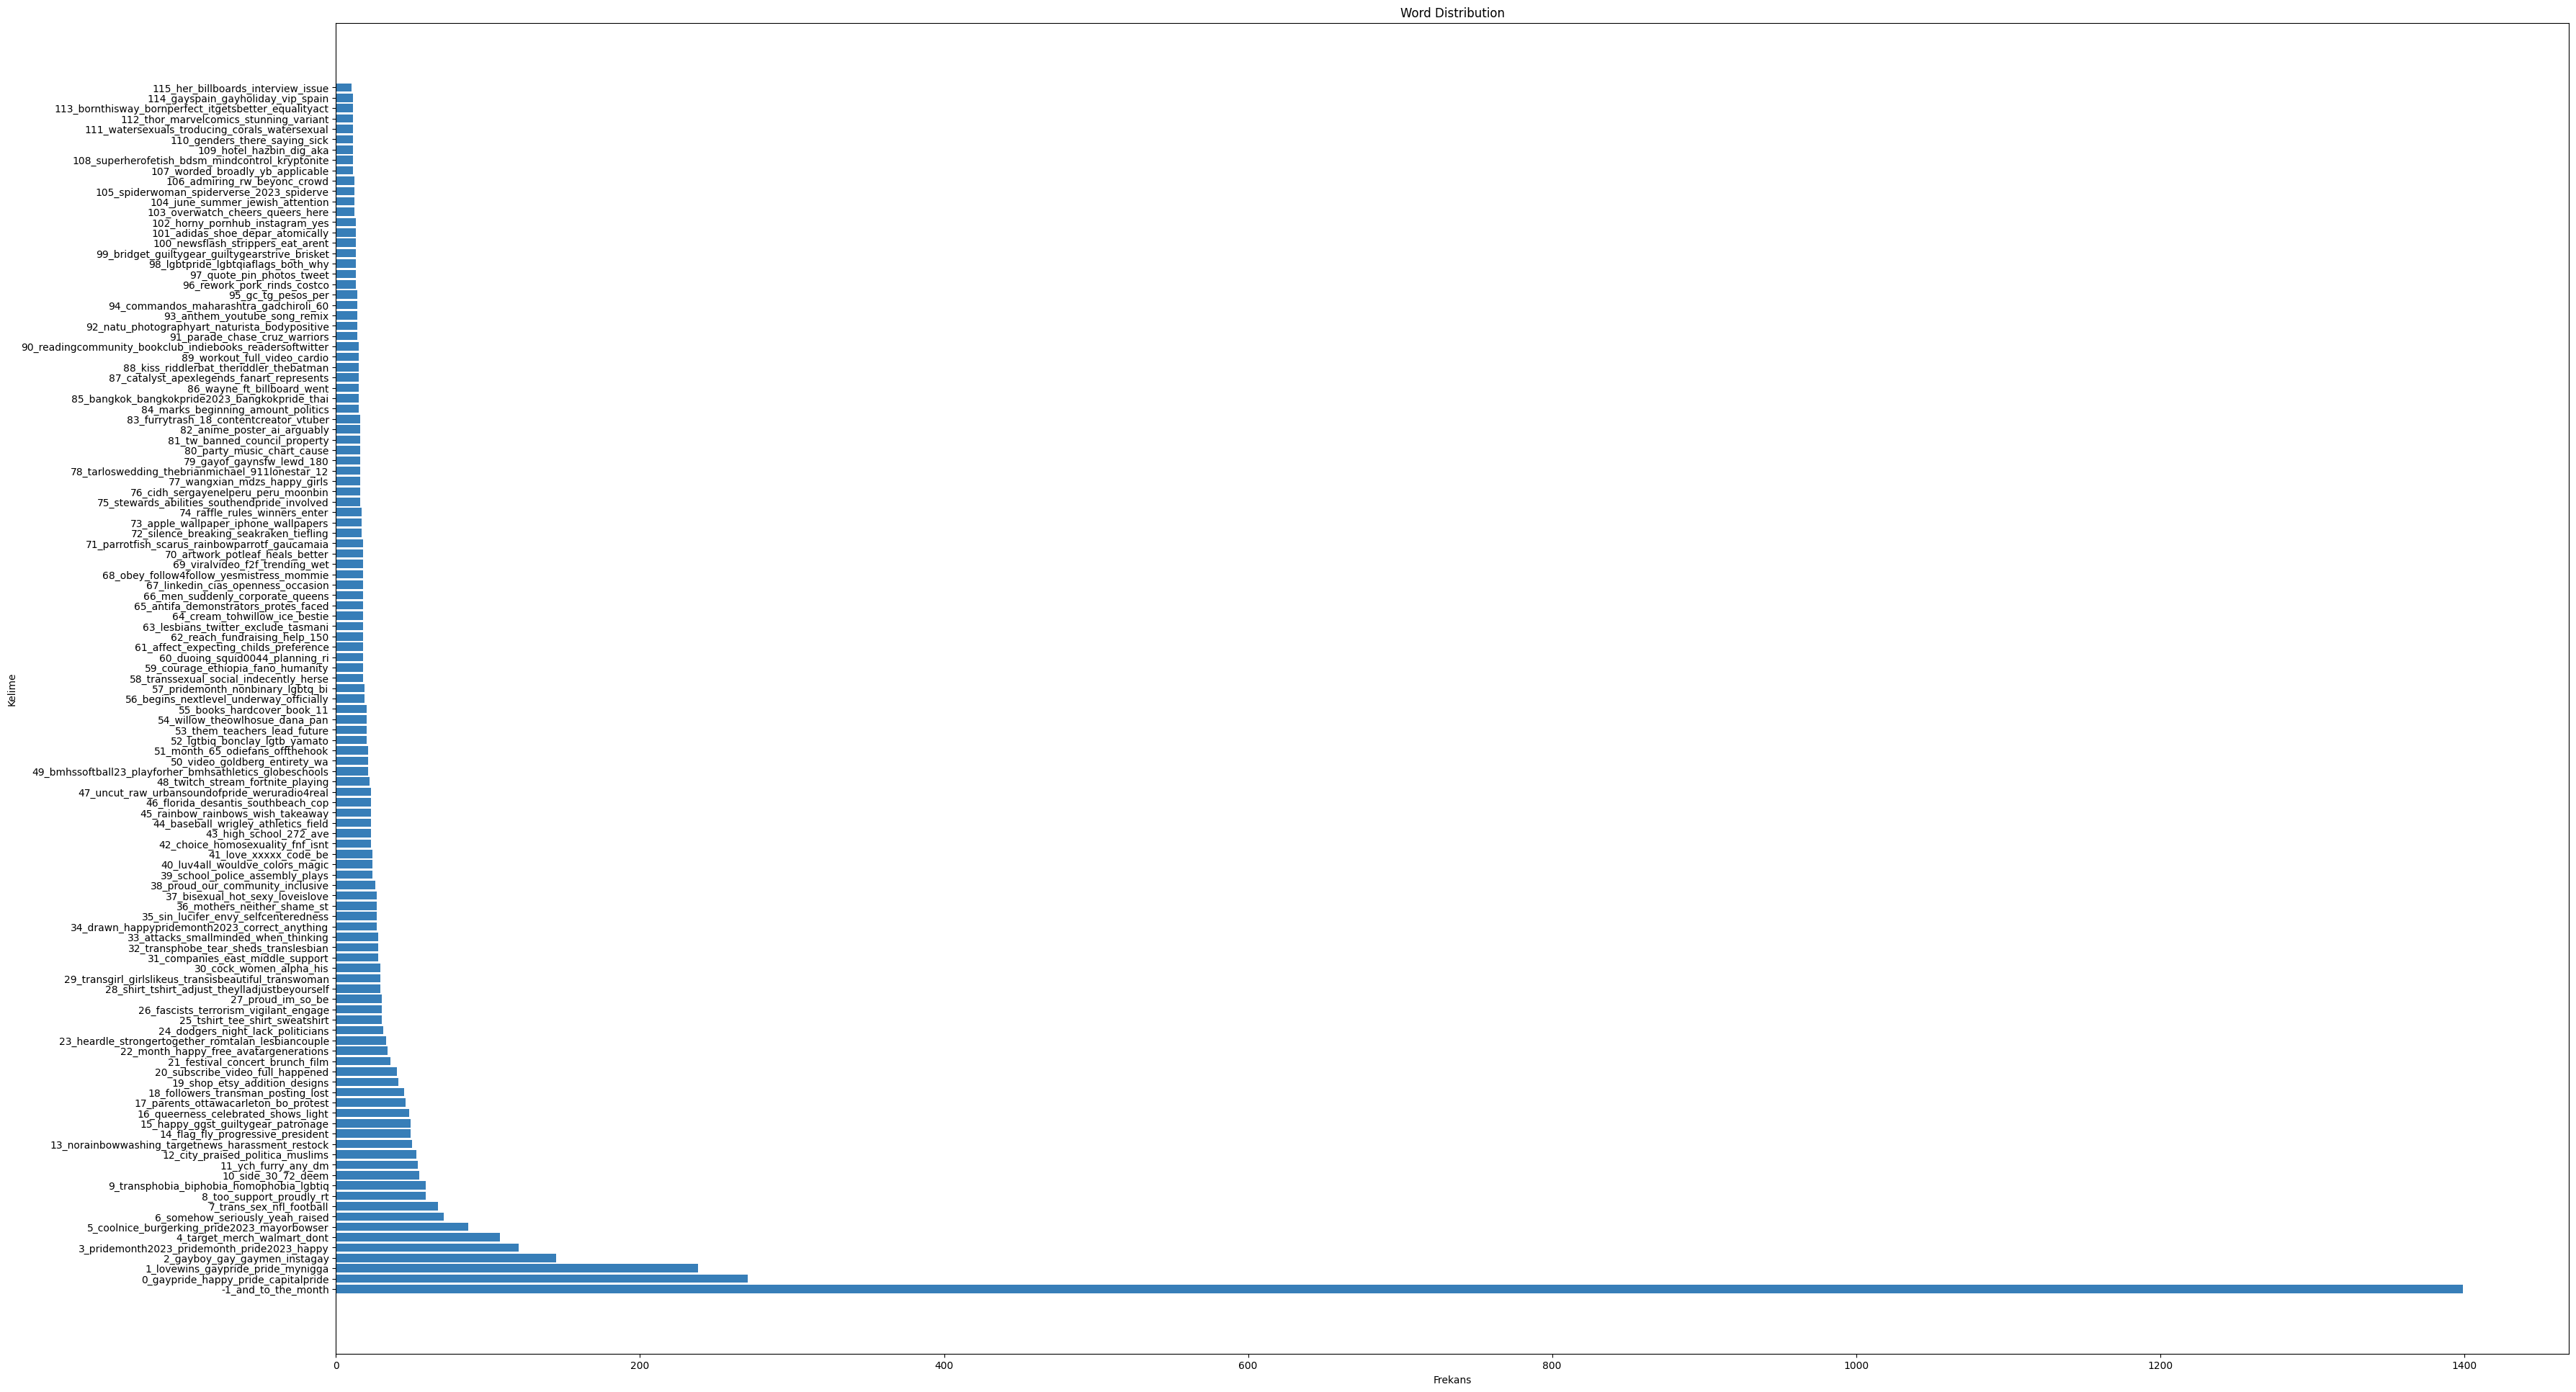

In [11]:
import matplotlib.pyplot as plt

# Word Distribution grafiğini oluşturma
if "Name" in topics_info:
    fig, ax = plt.subplots(figsize=(40, 24))
    ax.barh(topics_info["Name"], topics_info["Count"], color="#377eb8")
    plt.xlabel("Frekans")
    plt.ylabel("Kelime")
    plt.title("Word Distribution")

    # Grafiği PNG olarak kaydetme
    fig.savefig("word_distribution.png", dpi=300, bbox_inches="tight")
else:
    print("Sütun adı hatalı veya eksik. Lütfen veri çerçevesini kontrol edin.")

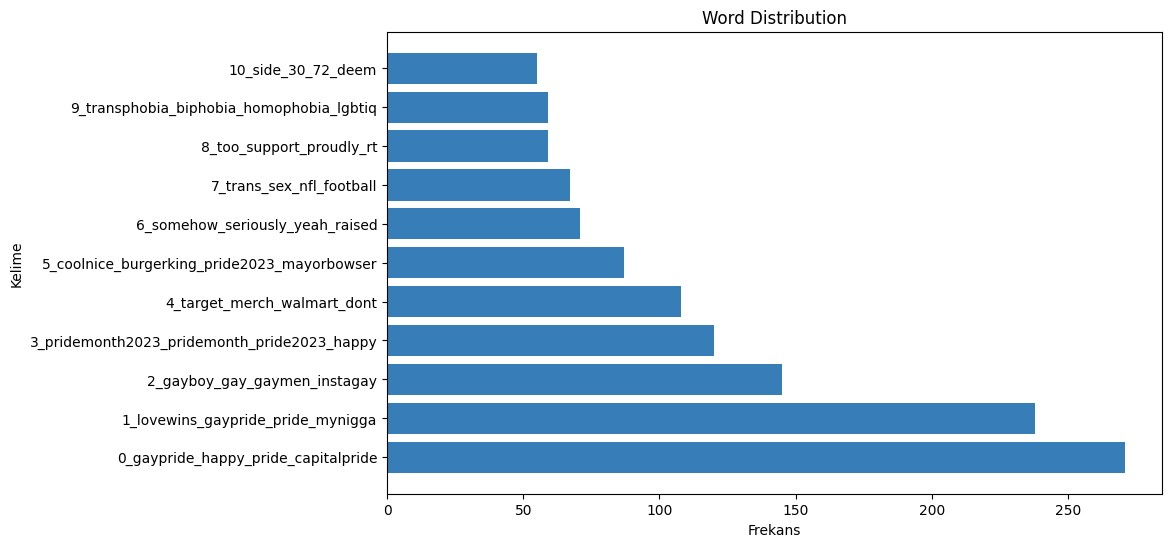

In [12]:
filtered_topics_info = topics_info[(topics_info["Topic"] >= 0) & (topics_info["Topic"] <= 10)]

if "Name" in filtered_topics_info:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(filtered_topics_info["Name"], filtered_topics_info["Count"], color="#377eb8")
    plt.xlabel("Frekans")
    plt.ylabel("Kelime")
    plt.title("Word Distribution")

    # Grafiği PNG olarak kaydetme
    fig.savefig("word_distribution_filtered.png", dpi=300, bbox_inches="tight")
else:
    print("Sütun adı hatalı veya eksik. Lütfen veri çerçevesini kontrol edin.")